### 1. Load Data

In [3]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("data/MNIST_data/train-images-idx3-ubyte.gz")
y_train = open_labels("data/MNIST_data/train-labels-idx1-ubyte.gz")

X_test = open_images("data/MNIST_data/t10k-images-idx3-ubyte.gz")
y_test = open_labels("data/MNIST_data/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
#Labels are one-hot encoded

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

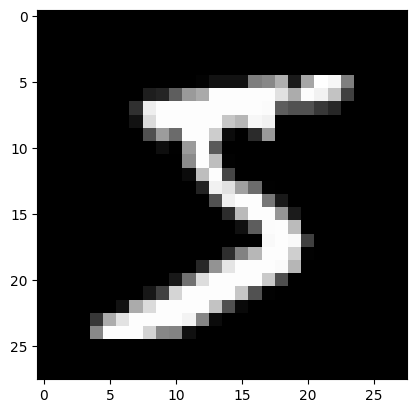

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")

### 2. Configure Models

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax")) #Output = activation(dot(input, kernel) + bias)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10


60/60 [==============================] - 27s 426ms/step - loss: 3.3394 - accuracy: 0.7556
Epoch 2/10
60/60 [==============================] - 26s 434ms/step - loss: 0.0868 - accuracy: 0.9731
Epoch 3/10
60/60 [==============================] - 28s 464ms/step - loss: 0.0514 - accuracy: 0.9839
Epoch 4/10
60/60 [==============================] - 26s 438ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 5/10
60/60 [==============================] - 27s 450ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 6/10
60/60 [==============================] - 26s 436ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 7/10
60/60 [==============================] - 26s 441ms/step - loss: 0.0165 - accuracy: 0.9949
Epoch 8/10
60/60 [==============================] - 27s 449ms/step - loss: 0.0129 - accuracy: 0.9964
Epoch 9/10
60/60 [==============================] - 26s 427ms/step - loss: 0.0097 - accuracy: 0.9975
Epoch 10/10
60/60 [==============================] - 27s 447ms/step - loss: 0.0076 - accu

1/1 [==============================] - 0s 21ms/step


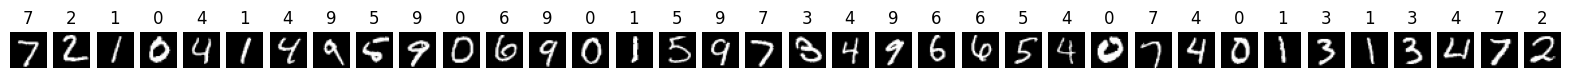

In [7]:
fig, axes = plt.subplots(1, 36, figsize=(20, 20))

for i in range(36):
    axes[i].imshow(X_test[i].reshape(28,28), cmap="gray")
    axes[i].set_title(np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1))))
    axes[i].axis("off")

In [ ]:
import tensorflow.keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

### 3. Results

In [8]:
# https://adamharley.com/nn_vis/cnn/3d.html

NameError: name 'data' is not defined

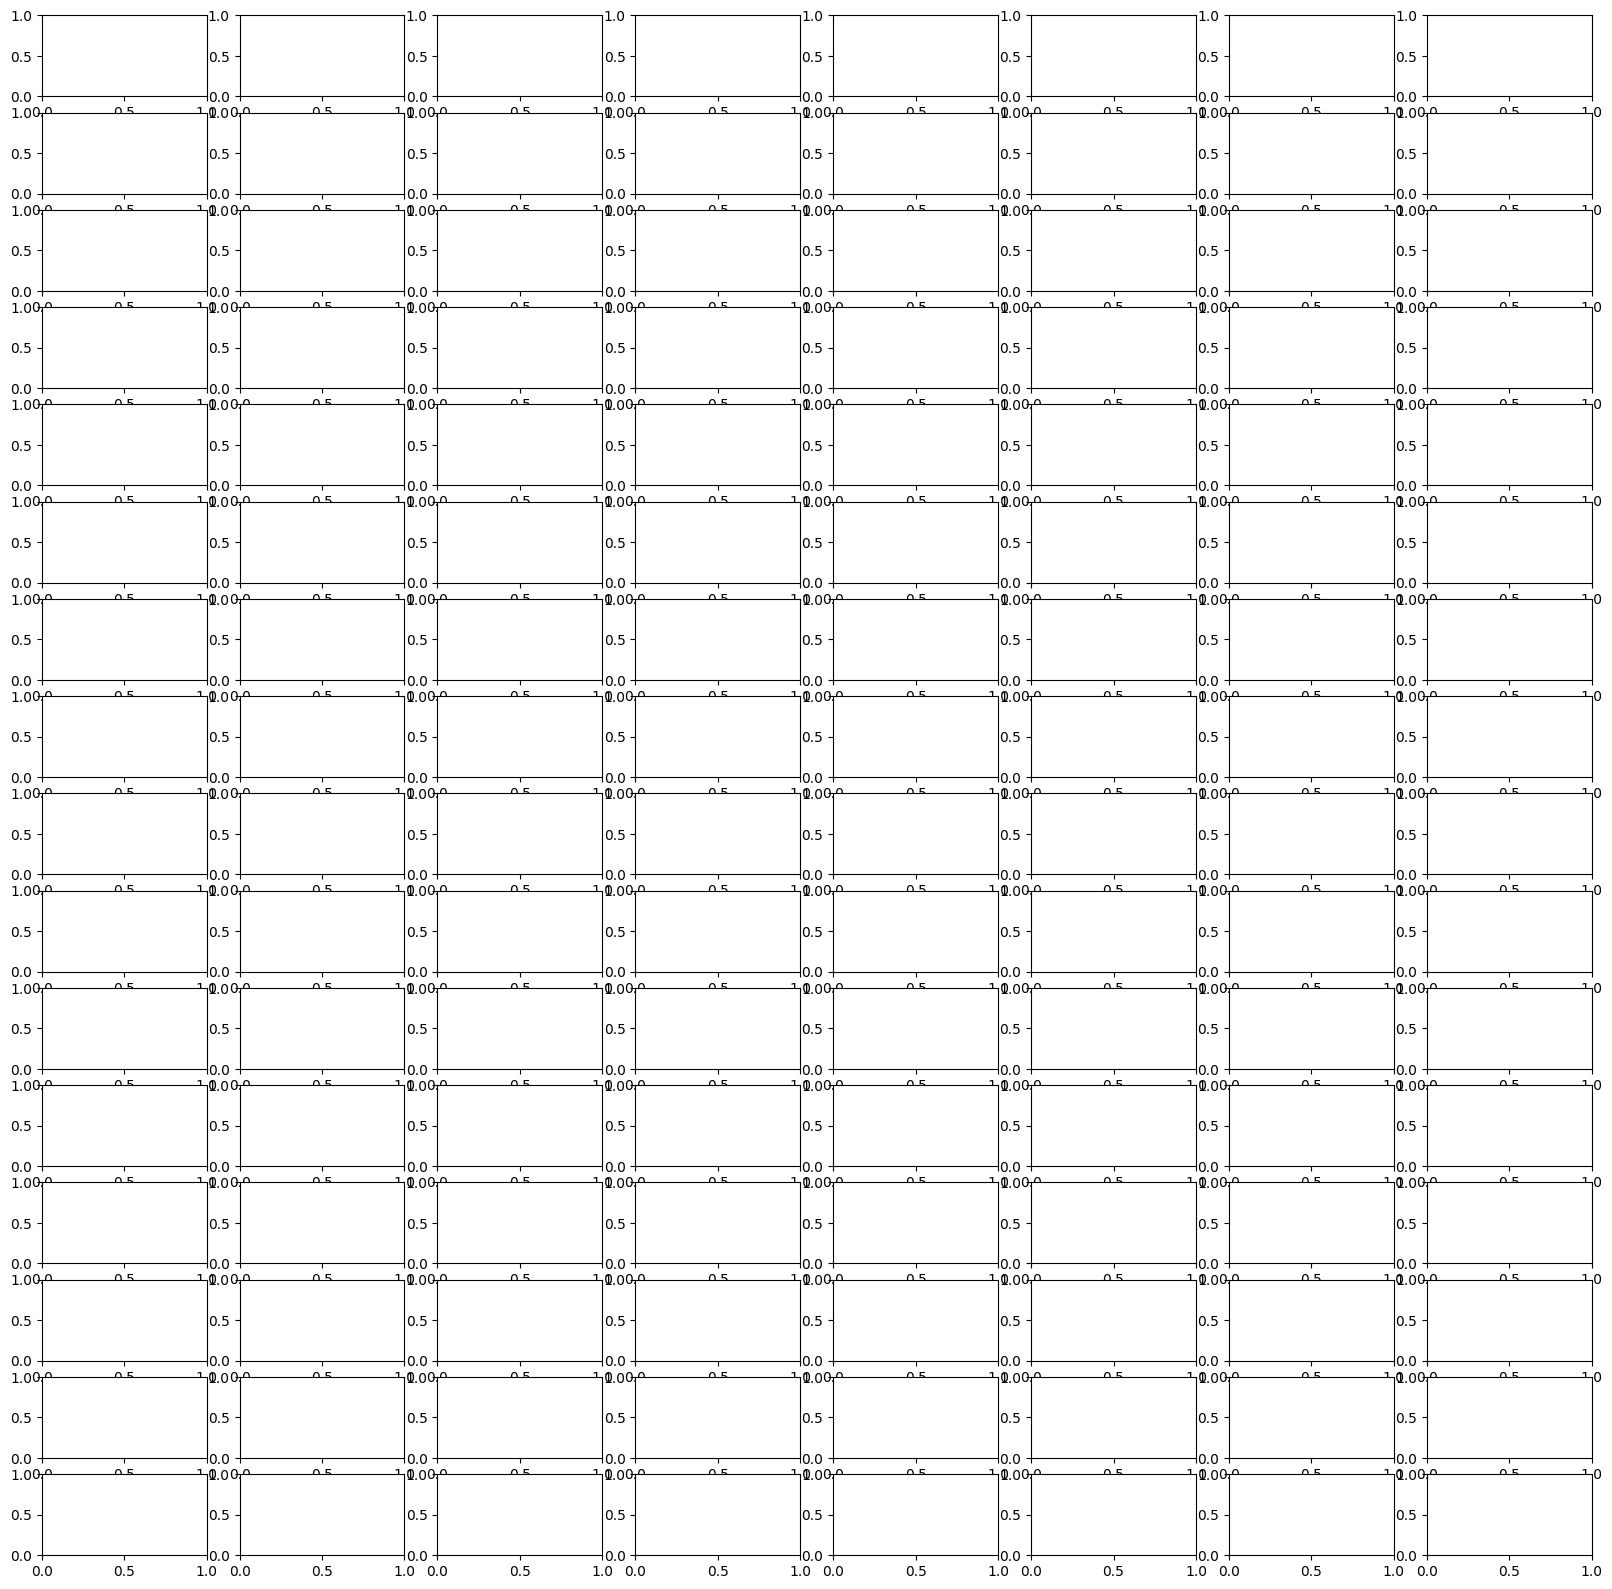

In [9]:
%matplotlib inline

fig, axes = plt.subplots(16, 8, figsize = (20, 20))

for i in range(16):
    for j in range(8):
        axes[i, j].imshow(data[:,:,0,i*8+j], cmap="gray")
        axes[i, j].axis("off")

plt.show()